In [30]:

from google.colab import files
uploaded = files.upload()

Saving covid_19_clean_complete.csv to covid_19_clean_complete (1).csv


In [0]:
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.simplefilter('ignore')

In [77]:
df = pd.read_csv("covid_19_clean_complete.csv", delimiter=",")
df.groupby(['Country/Region']).sum()
a = df['Country/Region']
print(a)
df.groupby(['Confirmed']).sum()
b = df['Confirmed']
print(b)
# date = [elem for elem in df['Date']]
# values = [elem for elem in df['Confirmed']]
# plt.xticks(range(0,len(date)),rotation=45)
# plt.plot(country, values)
df = pd.read_csv("covid_19_clean_complete.csv")
df.tail(5)

0                  Afghanistan
1                      Albania
2                      Algeria
3                      Andorra
4                       Angola
                 ...          
32060    Sao Tome and Principe
32061                    Yemen
32062                  Comoros
32063               Tajikistan
32064                  Lesotho
Name: Country/Region, Length: 32065, dtype: object
0           0
1           0
2           0
3           0
4           0
         ... 
32060     251
32061     197
32062      34
32063    2350
32064       1
Name: Confirmed, Length: 32065, dtype: int64


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
32060,NaN,Sao Tome and Principe,0.186360,6.613081,5/21/20,251,8,4
32061,NaN,Yemen,15.552727,48.516388,5/21/20,197,33,0
32062,NaN,Comoros,-11.645500,43.333300,5/21/20,34,1,8
32063,NaN,Tajikistan,38.861034,71.276093,5/21/20,2350,44,0
32064,NaN,Lesotho,-29.609988,28.233608,5/21/20,1,0,0


In [0]:
sns.set(palette = 'Set1',style='darkgrid')
#Function for making a time serie on a designated country and plotting the rolled mean and standard 
def roll(country,case='Confirmed'):
    ts=df.loc[(df['Country/Region']==country)]  
    ts=ts[['Date',case]]
    ts=ts.set_index('Date')
    ts.astype('int64')
    a=len(ts.loc[(ts['Confirmed']>=10)])
    ts=ts[-a:]
    return (ts.rolling(window=4,center=False).mean().dropna())


def rollPlot(country, case='Confirmed'):
    ts=df.loc[(df['Country/Region']==country)]  
    ts=ts[['Date',case]]
    ts=ts.set_index('Date')
    ts.astype('int64')
    a=len(ts.loc[(ts['Confirmed']>=10)])
    ts=ts[-a:]
    plt.figure(figsize=(16,6))
    plt.plot(ts.rolling(window=7,center=False).mean().dropna(),label='Rolling Mean')
    plt.plot(ts[case], label='ConfirmedCases')
    plt.plot(ts.rolling(window=7,center=False).std(),label='Rolling std')
    #plt.plot('Confirmed', label='First Line')
    plt.legend()
    plt.title('Cases distribution in %s with rolling mean and standard' %country)
    plt.xticks([])

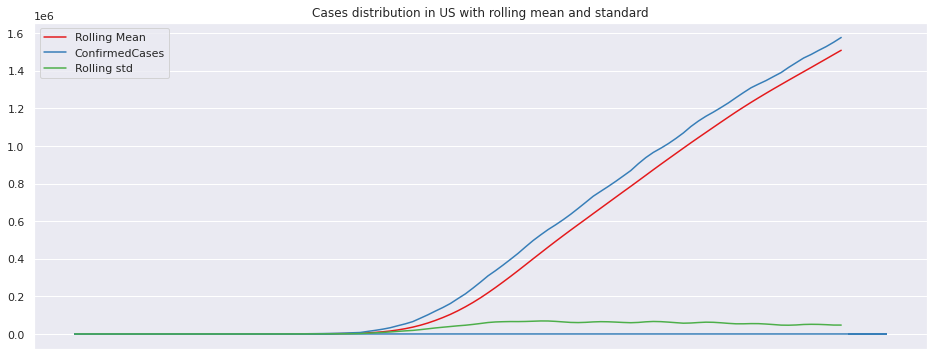

In [79]:
tsC1=roll('US')
rollPlot('US')

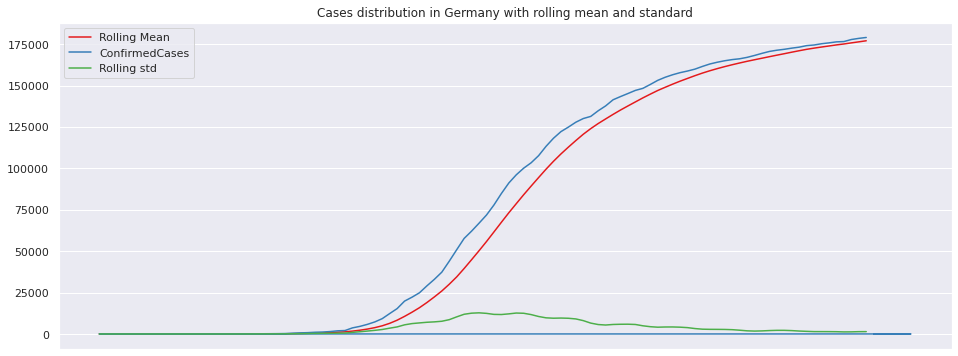

In [80]:
tsC2=roll('Germany')
rollPlot('Germany')

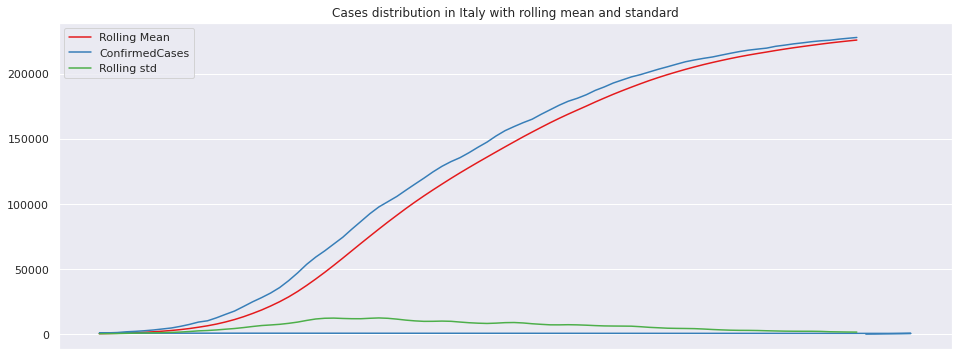

In [81]:
tsC3=roll('Italy')
rollPlot('Italy')

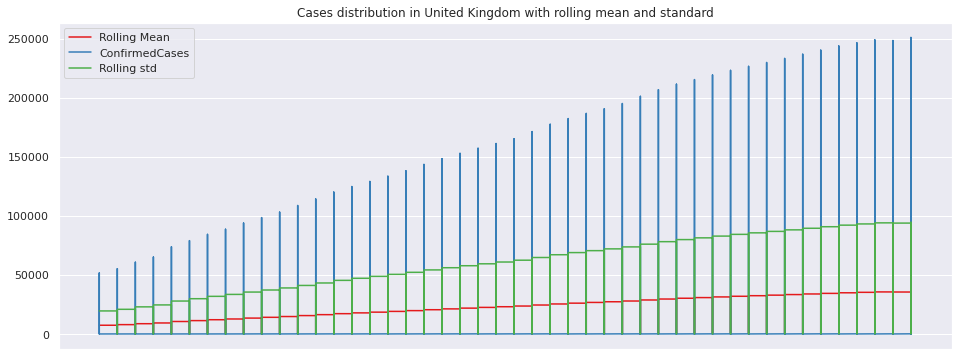

In [82]:
tsC4=roll('United Kingdom')
rollPlot('United Kingdom')

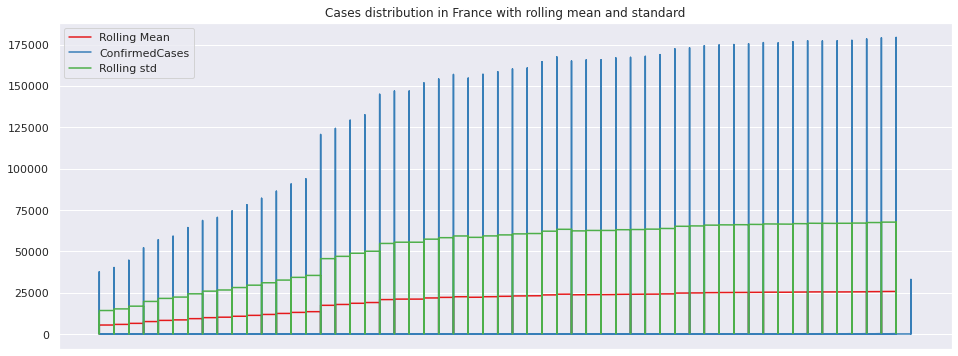

In [83]:
tsC5=roll('France')
rollPlot('France')

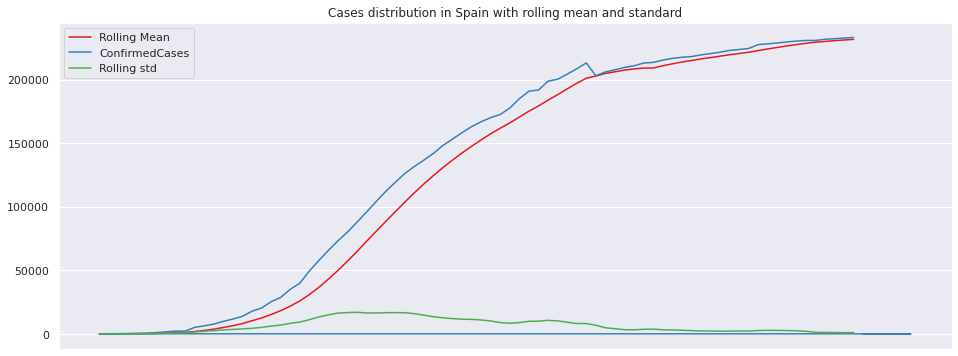

In [84]:
tsC6=roll('Spain')
rollPlot('Spain')

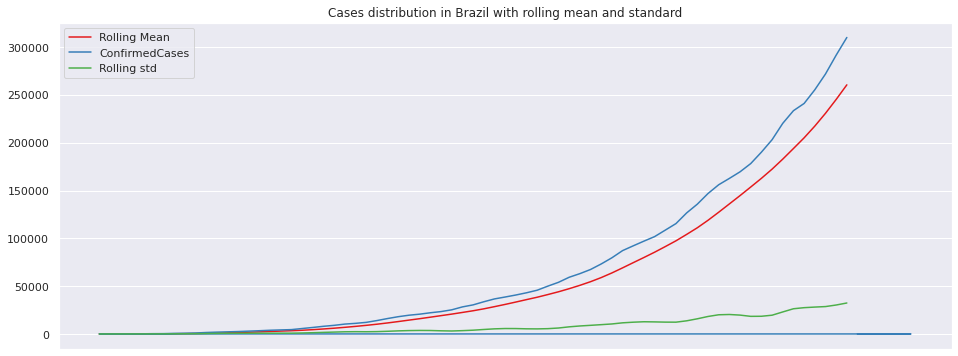

In [85]:
tsC7=roll('Brazil')
rollPlot('Brazil')

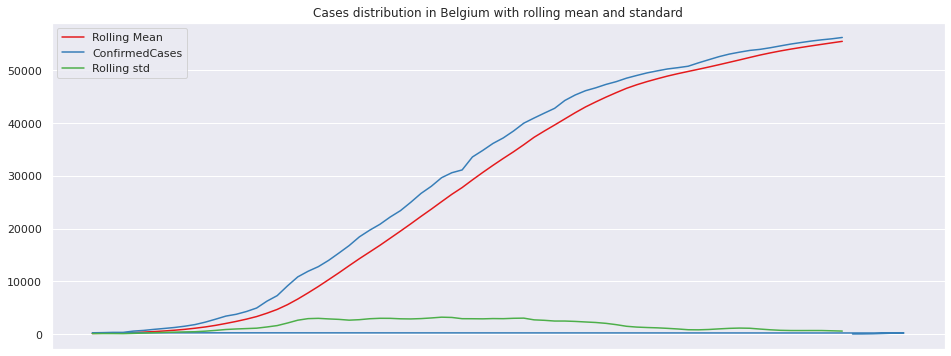

In [86]:
tsC8=roll('Belgium')
rollPlot('Belgium')

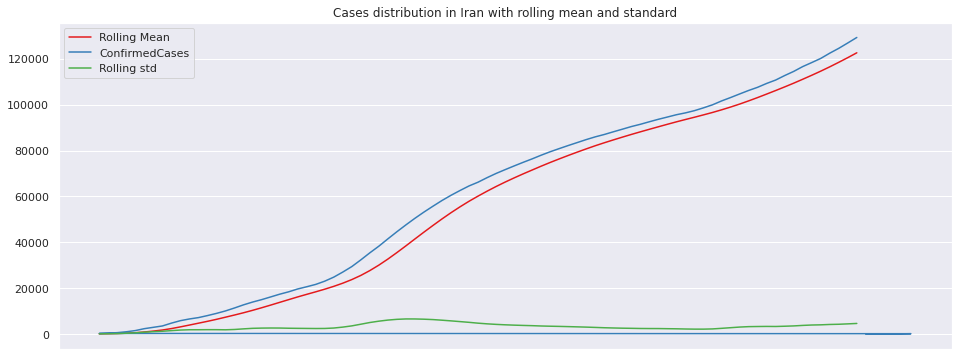

In [87]:
tsC9=roll('Iran')
rollPlot('Iran')

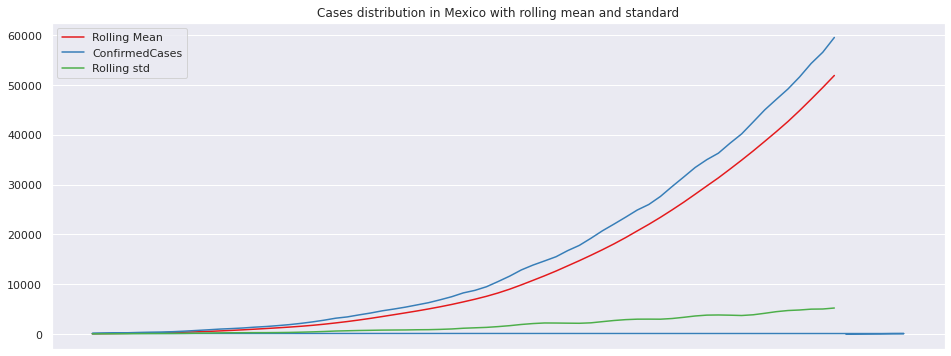

In [88]:
tsC10=roll('Mexico')
rollPlot('Mexico')

In [89]:
def stationarity(ts):
    print('Results of Dickey-Fuller Test:')
    test = adfuller(ts, autolag='AIC')
    results = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for i,val in test[4].items():
        results['Critical Value (%s)'%i] = val
    print (results)

#For US
tsC=tsC1['Confirmed'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                  0.090630
p-value                         0.965416
#Lags Used                      9.000000
Number of Observations Used    96.000000
Critical Value (1%)            -3.500379
Critical Value (5%)            -2.892152
Critical Value (10%)           -2.583100
dtype: float64


In [90]:
#For Germany
tsC=tsC2['Confirmed'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                 -0.842149
p-value                         0.806427
#Lags Used                     13.000000
Number of Observations Used    93.000000
Critical Value (1%)            -3.502705
Critical Value (5%)            -2.893158
Critical Value (10%)           -2.583637
dtype: float64


In [92]:
#For Italy
tsC=tsC3['Confirmed'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                 -2.591619
p-value                         0.094742
#Lags Used                      9.000000
Number of Observations Used    78.000000
Critical Value (1%)            -3.517114
Critical Value (5%)            -2.899375
Critical Value (10%)           -2.586955
dtype: float64


In [93]:
#For UK
tsC=tsC4['Confirmed'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                  -5.607278
p-value                          0.000001
#Lags Used                      18.000000
Number of Observations Used    480.000000
Critical Value (1%)             -3.444047
Critical Value (5%)             -2.867580
Critical Value (10%)            -2.569987
dtype: float64


In [94]:
#For France
tsC=tsC5['Confirmed'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                  -2.925084
p-value                          0.042508
#Lags Used                      19.000000
Number of Observations Used    587.000000
Critical Value (1%)             -3.441539
Critical Value (5%)             -2.866476
Critical Value (10%)            -2.569399
dtype: float64


In [95]:
#For Spain
tsC=tsC6['Confirmed'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                 -2.377547
p-value                         0.148174
#Lags Used                      9.000000
Number of Observations Used    73.000000
Critical Value (1%)            -3.523284
Critical Value (5%)            -2.902031
Critical Value (10%)           -2.588371
dtype: float64


In [96]:
#For Brazil
tsC=tsC7['Confirmed'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                  0.971843
p-value                         0.993960
#Lags Used                      9.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


In [97]:
#For Belgium
tsC=tsC8['Confirmed'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                 -2.024721
p-value                         0.275840
#Lags Used                      7.000000
Number of Observations Used    69.000000
Critical Value (1%)            -3.528890
Critical Value (5%)            -2.904440
Critical Value (10%)           -2.589656
dtype: float64


In [98]:
#For Iran
tsC=tsC9['Confirmed'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                  0.194559
p-value                         0.971955
#Lags Used                     10.000000
Number of Observations Used    77.000000
Critical Value (1%)            -3.518281
Critical Value (5%)            -2.899878
Critical Value (10%)           -2.587223
dtype: float64


In [99]:
#For Mexico
tsC=tsC10['Confirmed'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                 -0.512047
p-value                         0.889644
#Lags Used                     11.000000
Number of Observations Used    56.000000
Critical Value (1%)            -3.552928
Critical Value (5%)            -2.914731
Critical Value (10%)           -2.595137
dtype: float64
